## Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model


### Importing Library

In [2]:
import numpy
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv('data/stud.csv')

In [4]:
df.head(10)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [5]:
df.shape

(1000, 8)

## 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

In [6]:
df.isna().sum() # Checking Missing Values

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [7]:
df.duplicated().sum() # Checking Duplicates

0

In [8]:
df.info() # checking Data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [9]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [10]:
df.describe() # checking statistics

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [11]:
print("Categories in 'gender' variable:",end="")
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:",end="")
print(df['race_ethnicity'].unique())

print("Categories in 'parental_level_of_education' variable:",end="")
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:",end="")
print(df['lunch'].unique())

print("Categories in 'test_preparation' variable:",end="")
print(df['test_preparation_course'].unique())


Categories in 'gender' variable:['female' 'male']
Categories in 'race_ethnicity' variable:['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental_level_of_education' variable:["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:['standard' 'free/reduced']
Categories in 'test_preparation' variable:['none' 'completed']


In [12]:
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']

In [13]:
print('We have {} Numeric features : {}'.format(len(numeric_features),numeric_features))
print('We have {} Categorical features : {}'.format(len(categorical_features),categorical_features))

We have 3 Numeric features : ['math_score', 'reading_score', 'writing_score']
We have 5 Categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [14]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


In [15]:
df['total_score'] = df['math_score'] + df['reading_score']+df['writing_score']
df['average'] = df['total_score']/3
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


In [16]:
df.shape

(1000, 10)

In [17]:
reading_full = df[df['reading_score']==100]['average'].count()
writing_full = df[df['writing_score']==100]['average'].count()
math_full = df[df['math_score']==100]['average'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [18]:
reading_less_20 = df[df['reading_score']<=20]['average'].count()
writing_less_20 = df[df['writing_score']<=20]['average'].count()
math_less_20 = df[df['math_score']<=20]['average'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


# Visualization
- Histogram
- Kernel Distribution Function (KDE)

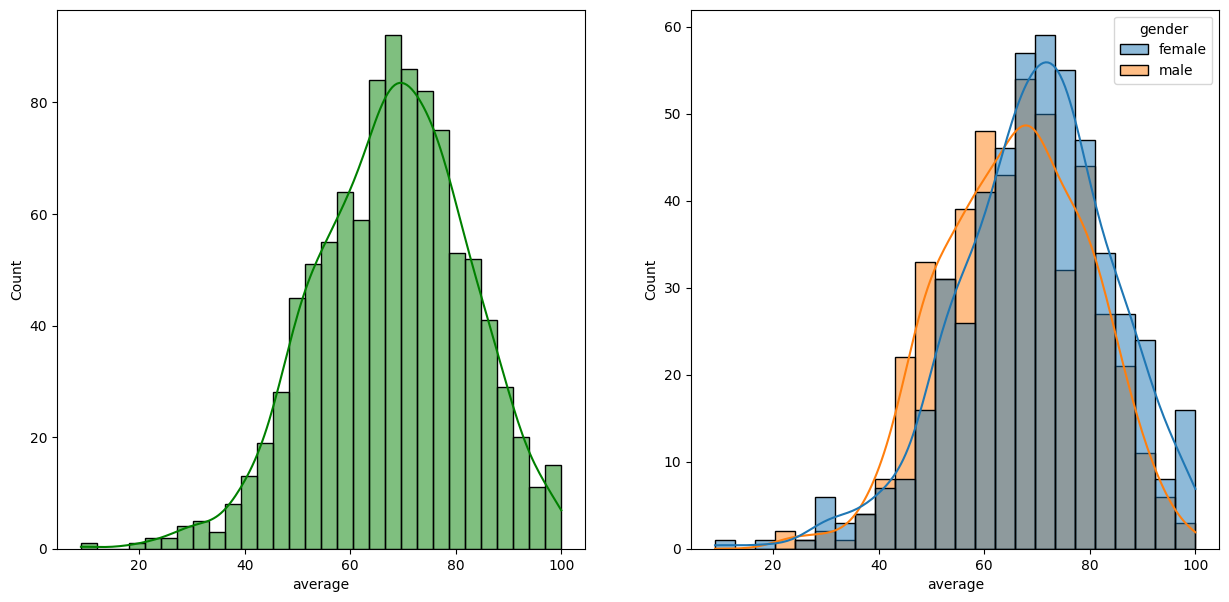

In [19]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()

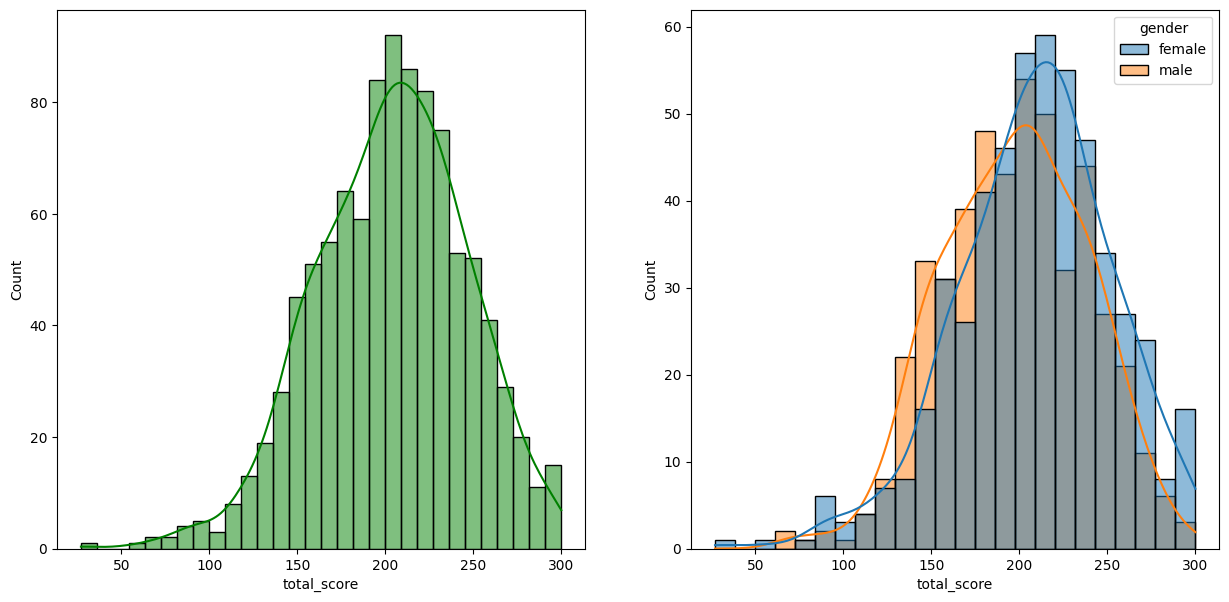

In [20]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='total_score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total_score',kde=True,hue='gender')
plt.show()

# insight
- female students perform well than male students

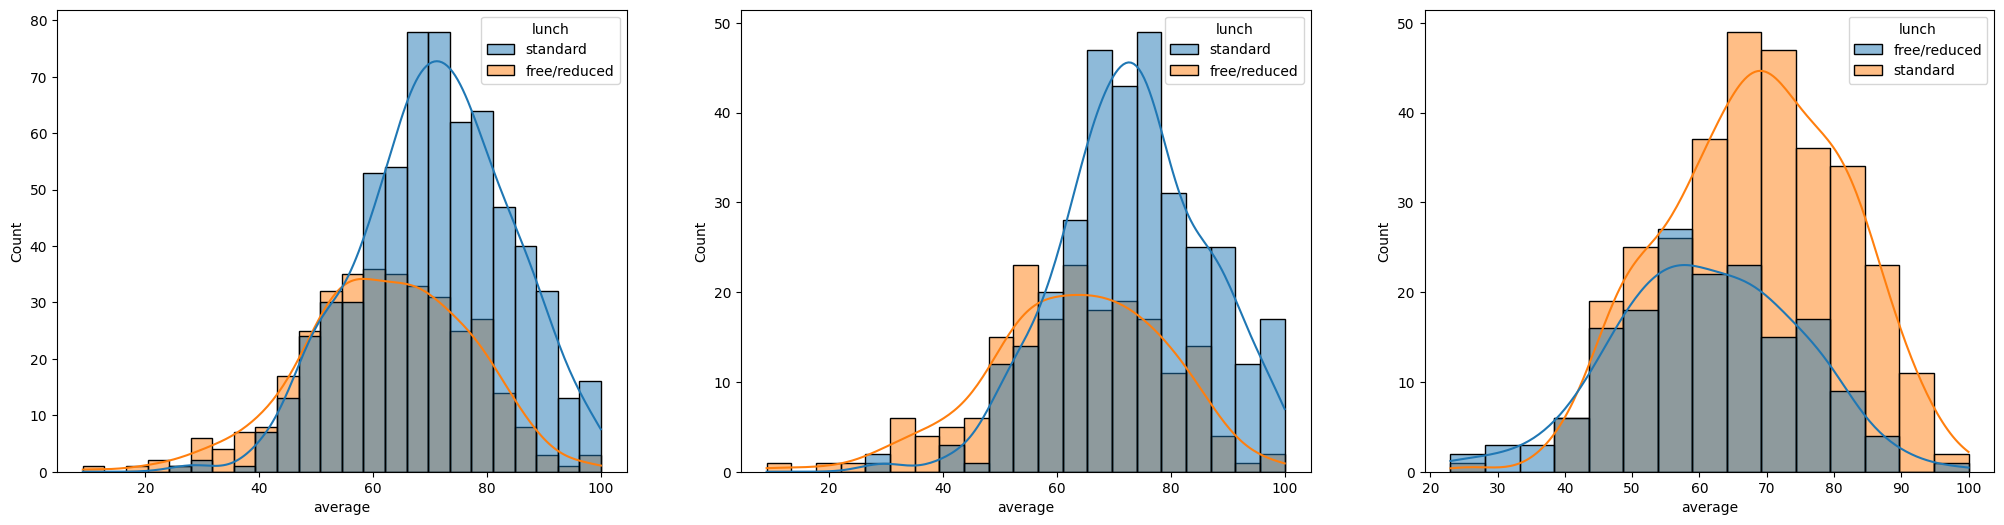

In [21]:
plt.subplots(1,3, figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')
plt.show()

### Insights
- Standard lunch helps perform well in exams.
- Standard lunch helps perform well in exams be it a male or a female.

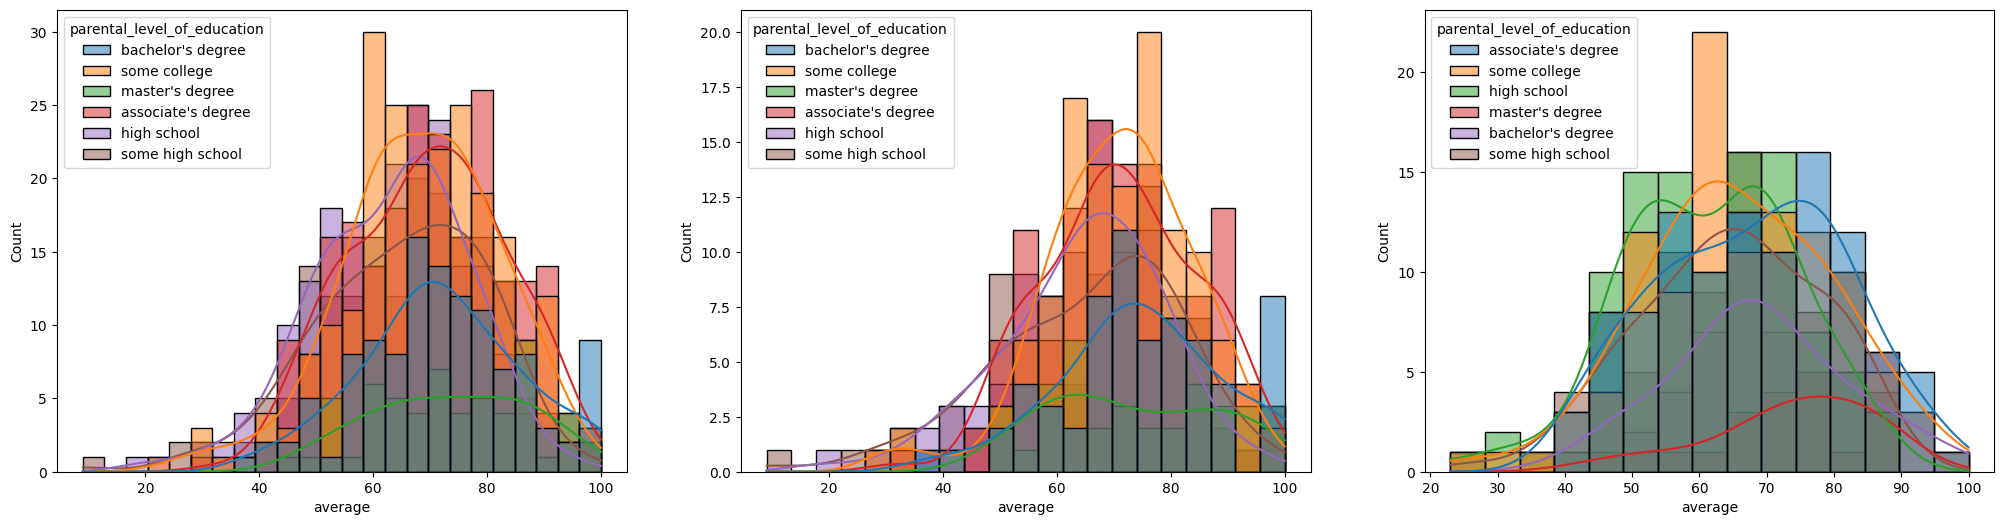

In [22]:
plt.subplots(1,3, figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df,x='average',kde=True,hue='parental_level_of_education')
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental_level_of_education')
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental_level_of_education')
plt.show()

### Insights
- In general parent's education don't help student perform well in exam.
- 2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
- 3rd plot we can see there is no effect of parent's education on female students.

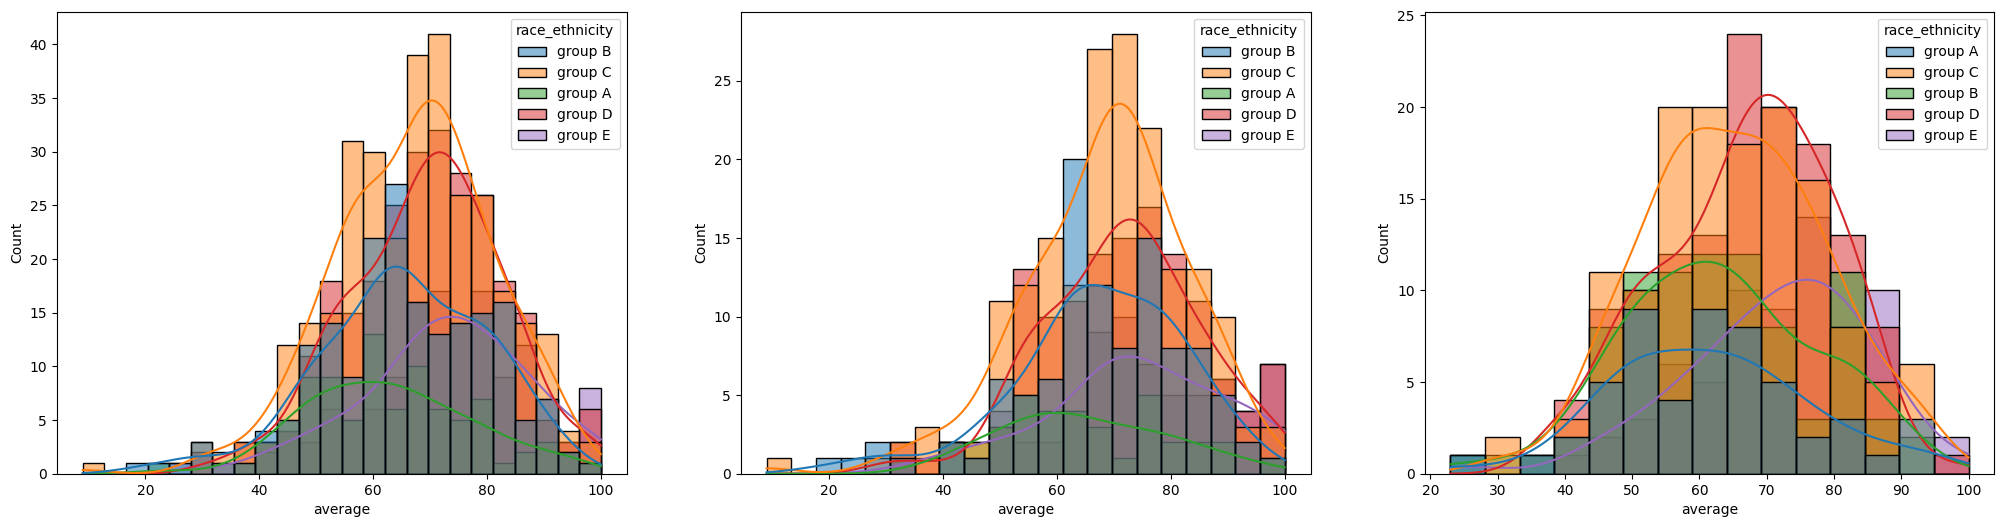

In [23]:
plt.subplots(1,3, figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df,x='average',kde=True,hue='race_ethnicity')
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race_ethnicity')
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race_ethnicity')
plt.show()

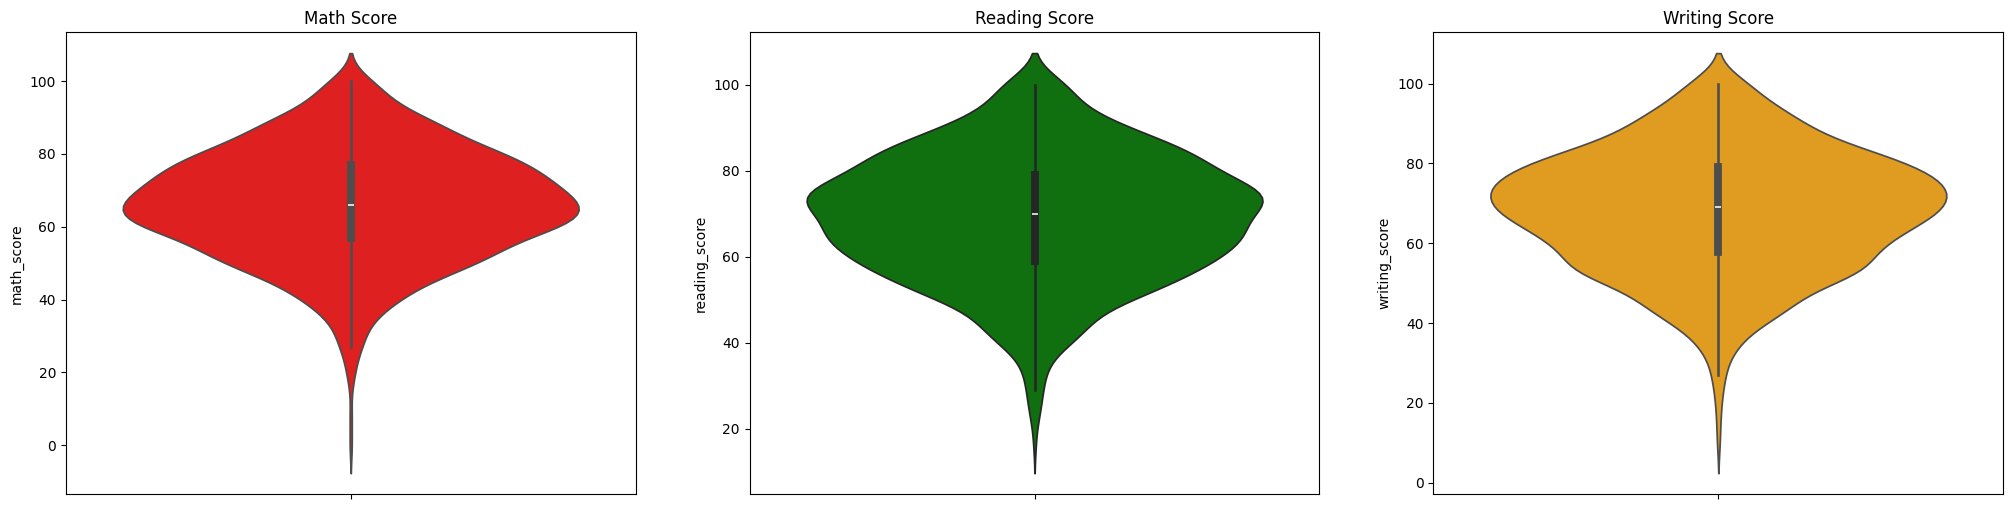

In [24]:
# Maximumum score of students in all three subjects

plt.subplots(1,3, figsize=(25,6))
plt.subplot(131)
plt.title('Math Score')
sns.violinplot(y='math_score',data=df, color='red')
plt.subplot(132)
plt.title('Reading Score')
sns.violinplot(y='reading_score',data=df,color='green')
plt.subplot(133)
plt.title('Writing Score')
sns.violinplot(y='writing_score',data=df,color='orange')
plt.show()

## Insights
- From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

## Multivariate Analysis

In [38]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'total_score', 'average'],
      dtype='object')

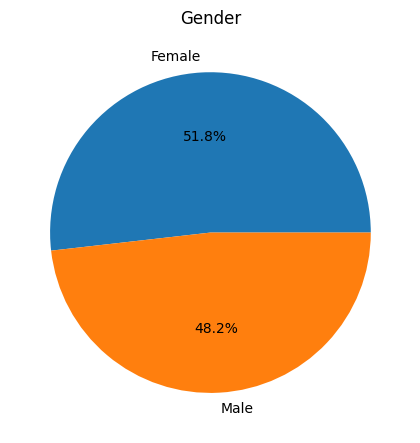

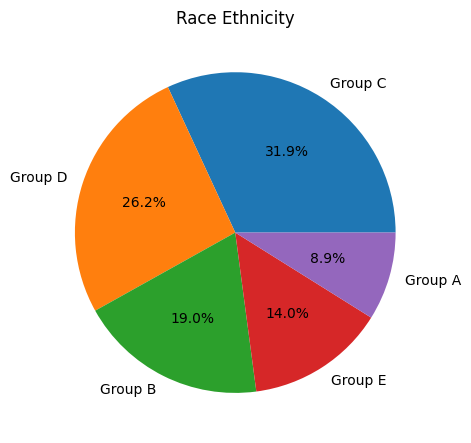

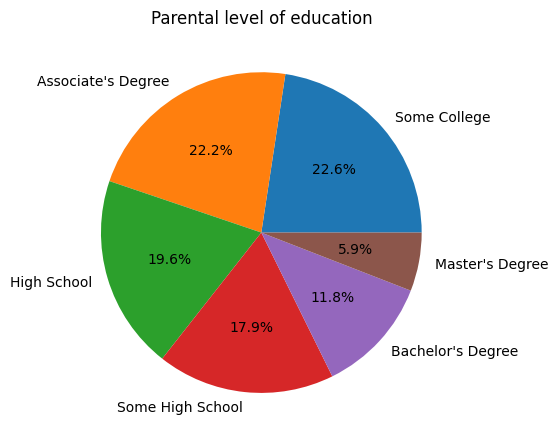

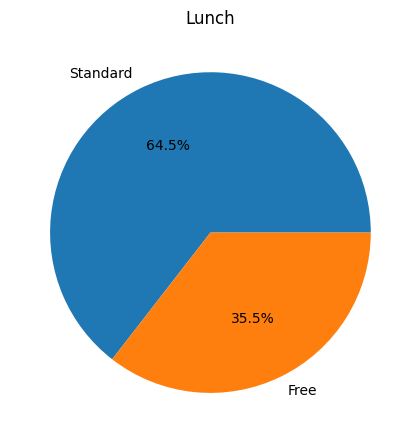

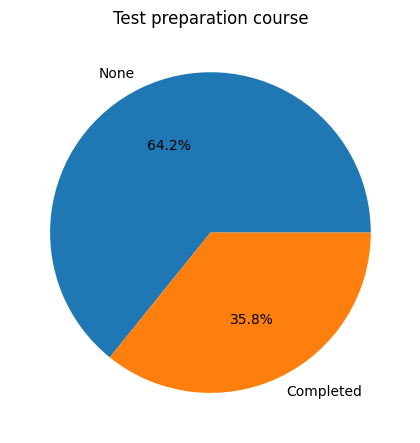

In [40]:
#plt.subplot(1,5, figsize=(30,2))

plt.subplot(151)
plt.title('Gender')
size = df['gender'].value_counts()
labels='Female', 'Male'
plt.pie(size,labels=labels,autopct='%1.1f%%')
plt.show()

plt.subplot(152)
plt.title('Race Ethnicity')
size = df['race_ethnicity'].value_counts()
labels='Group C', 'Group D','Group B','Group E','Group A'
plt.pie(size,labels=labels,autopct='%1.1f%%')
plt.show()

plt.subplot(153)
plt.title('Parental level of education')
size = df['parental_level_of_education'].value_counts()
labels='Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
plt.pie(size,labels=labels,autopct='%1.1f%%')
plt.show()

plt.subplot(154)
plt.title('Lunch')
size = df['lunch'].value_counts()
labels='Standard', 'Free'
plt.pie(size,labels=labels,autopct='%1.1f%%')
plt.show()

plt.subplot(155)
plt.title('Test preparation course')
size = df['test_preparation_course'].value_counts()
labels='None', 'Completed'
plt.pie(size,labels=labels,autopct='%1.1f%%')
plt.show()



##Insights
- Number of Male and Female students is almost equal
- Number students are greatest in Group C
- Number of students who have standard lunch are greater
- Number of students who have not enrolled in any test preparation    course is greater
- Number of students whose parental education is "Some College" is - greater followed closely by "Associate's Degree"

### univariate analysis

C:\Users\Gopal\AppData\Local\Temp\ipykernel_1980\2843821309.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df['gender'],palette = "Set1")


<Axes: xlabel='count', ylabel='gender'>

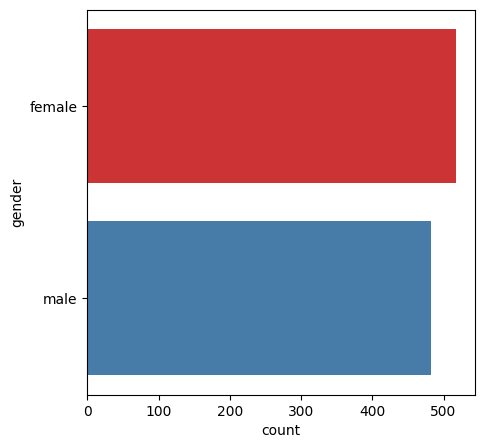

In [55]:
plt.figure(figsize=(5, 5)) 
sns.countplot(data=df['gender'],palette = "Set1")

- Gender has balanced data with female students are 518 (48%) and male students are 482 (52%)

C:\Users\Gopal\AppData\Local\Temp\ipykernel_1980\2991739618.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df['race_ethnicity'],palette = "Set1")


<Axes: xlabel='count', ylabel='race_ethnicity'>

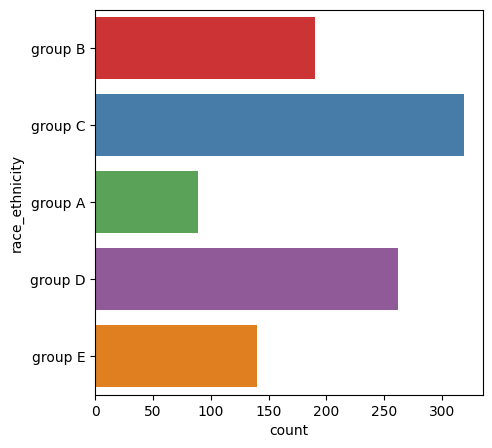

In [66]:
plt.figure(figsize=(5, 5)) 
sns.countplot(data=df['race_ethnicity'],palette = "Set1")

C:\Users\Gopal\AppData\Local\Temp\ipykernel_1980\3236658697.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df['parental_level_of_education'],palette = "Set1")


<Axes: xlabel='count', ylabel='parental_level_of_education'>

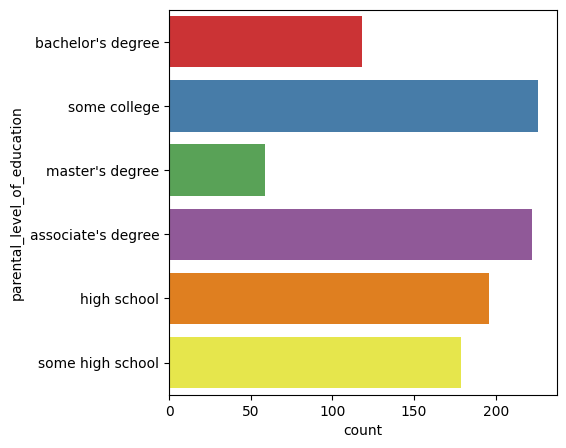

In [70]:
plt.figure(figsize=(5, 5)) 
sns.countplot(data=df['parental_level_of_education'],palette = "Set1")

C:\Users\Gopal\AppData\Local\Temp\ipykernel_1980\2719316174.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df['lunch'],palette = "Set1")


<Axes: xlabel='count', ylabel='lunch'>

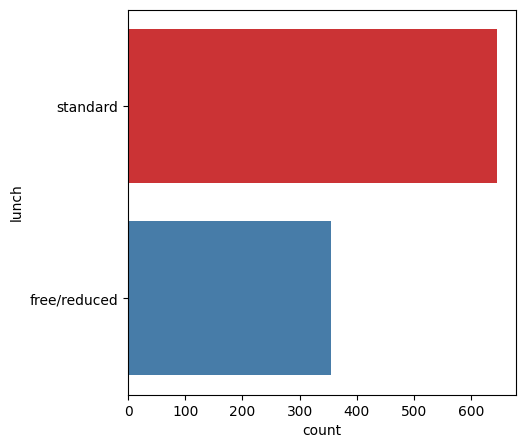

In [77]:
plt.figure(figsize=(5, 5)) 
sns.countplot(data=df['lunch'],palette = "Set1")

### BIVARIATE ANALYSIS

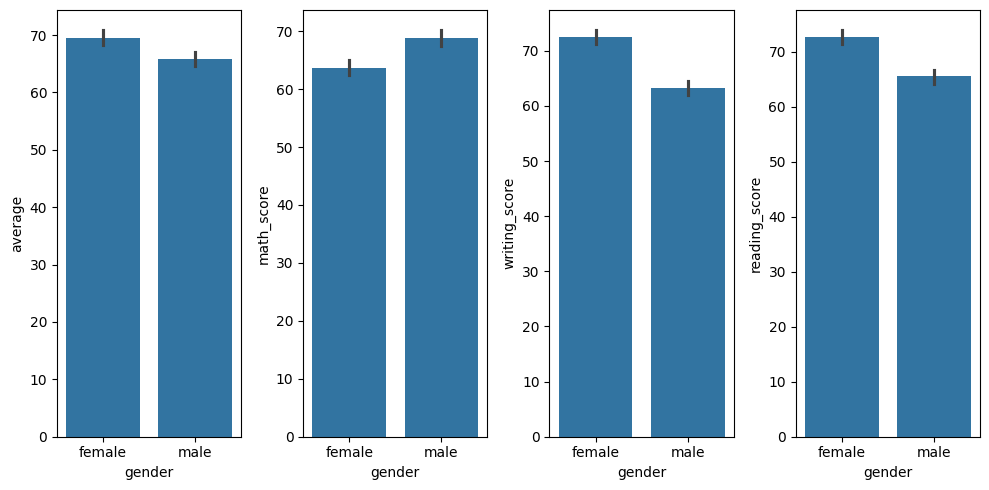

In [65]:
#plt.subplot(1,4)
plt.figure(figsize=(10, 5)) 
plt.subplot(141)
sns.barplot(x=df['gender'],y=df['average'])
plt.subplot(142)
sns.barplot(x=df['gender'],y=df['math_score'])
plt.subplot(143)
sns.barplot(x=df['gender'],y=df['writing_score'])
plt.subplot(144)
sns.barplot(x=df['gender'],y=df['reading_score'])
plt.tight_layout() 
plt.show()

## Insights
- On an average females have a better overall score than men.

- whereas males have scored higher in Maths.

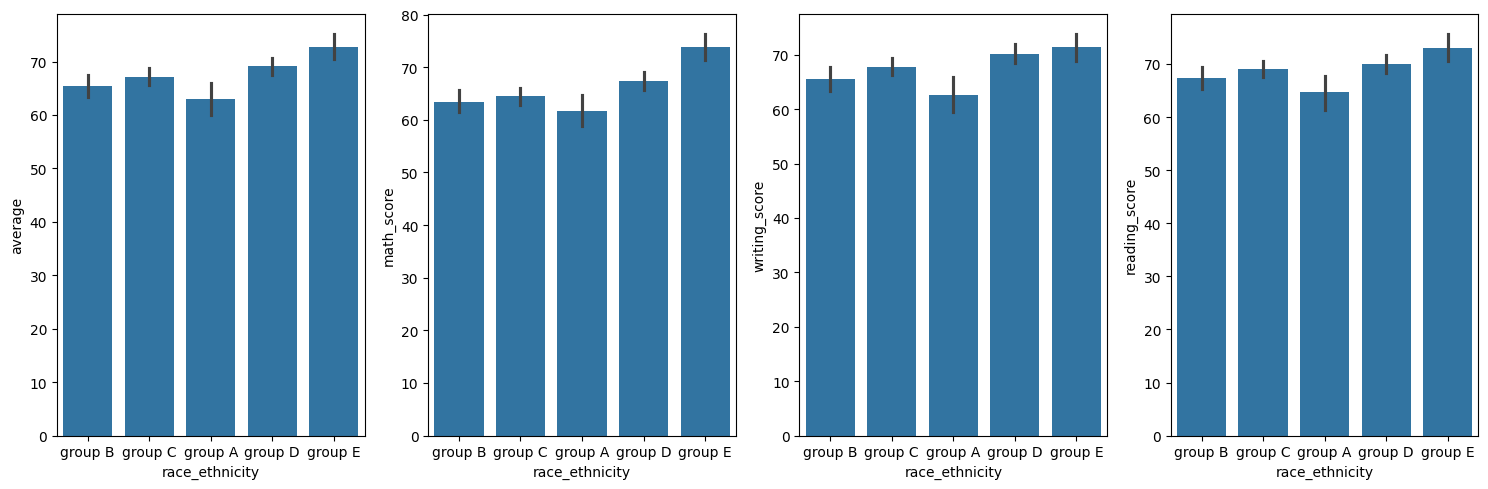

In [69]:
plt.figure(figsize=(15, 5)) 
plt.subplot(141)
sns.barplot(x=df['race_ethnicity'],y=df['average'])
plt.subplot(142)
sns.barplot(x=df['race_ethnicity'],y=df['math_score'])
plt.subplot(143)
sns.barplot(x=df['race_ethnicity'],y=df['writing_score'])
plt.subplot(144)
sns.barplot(x=df['race_ethnicity'],y=df['reading_score'])
plt.tight_layout() 
plt.show()

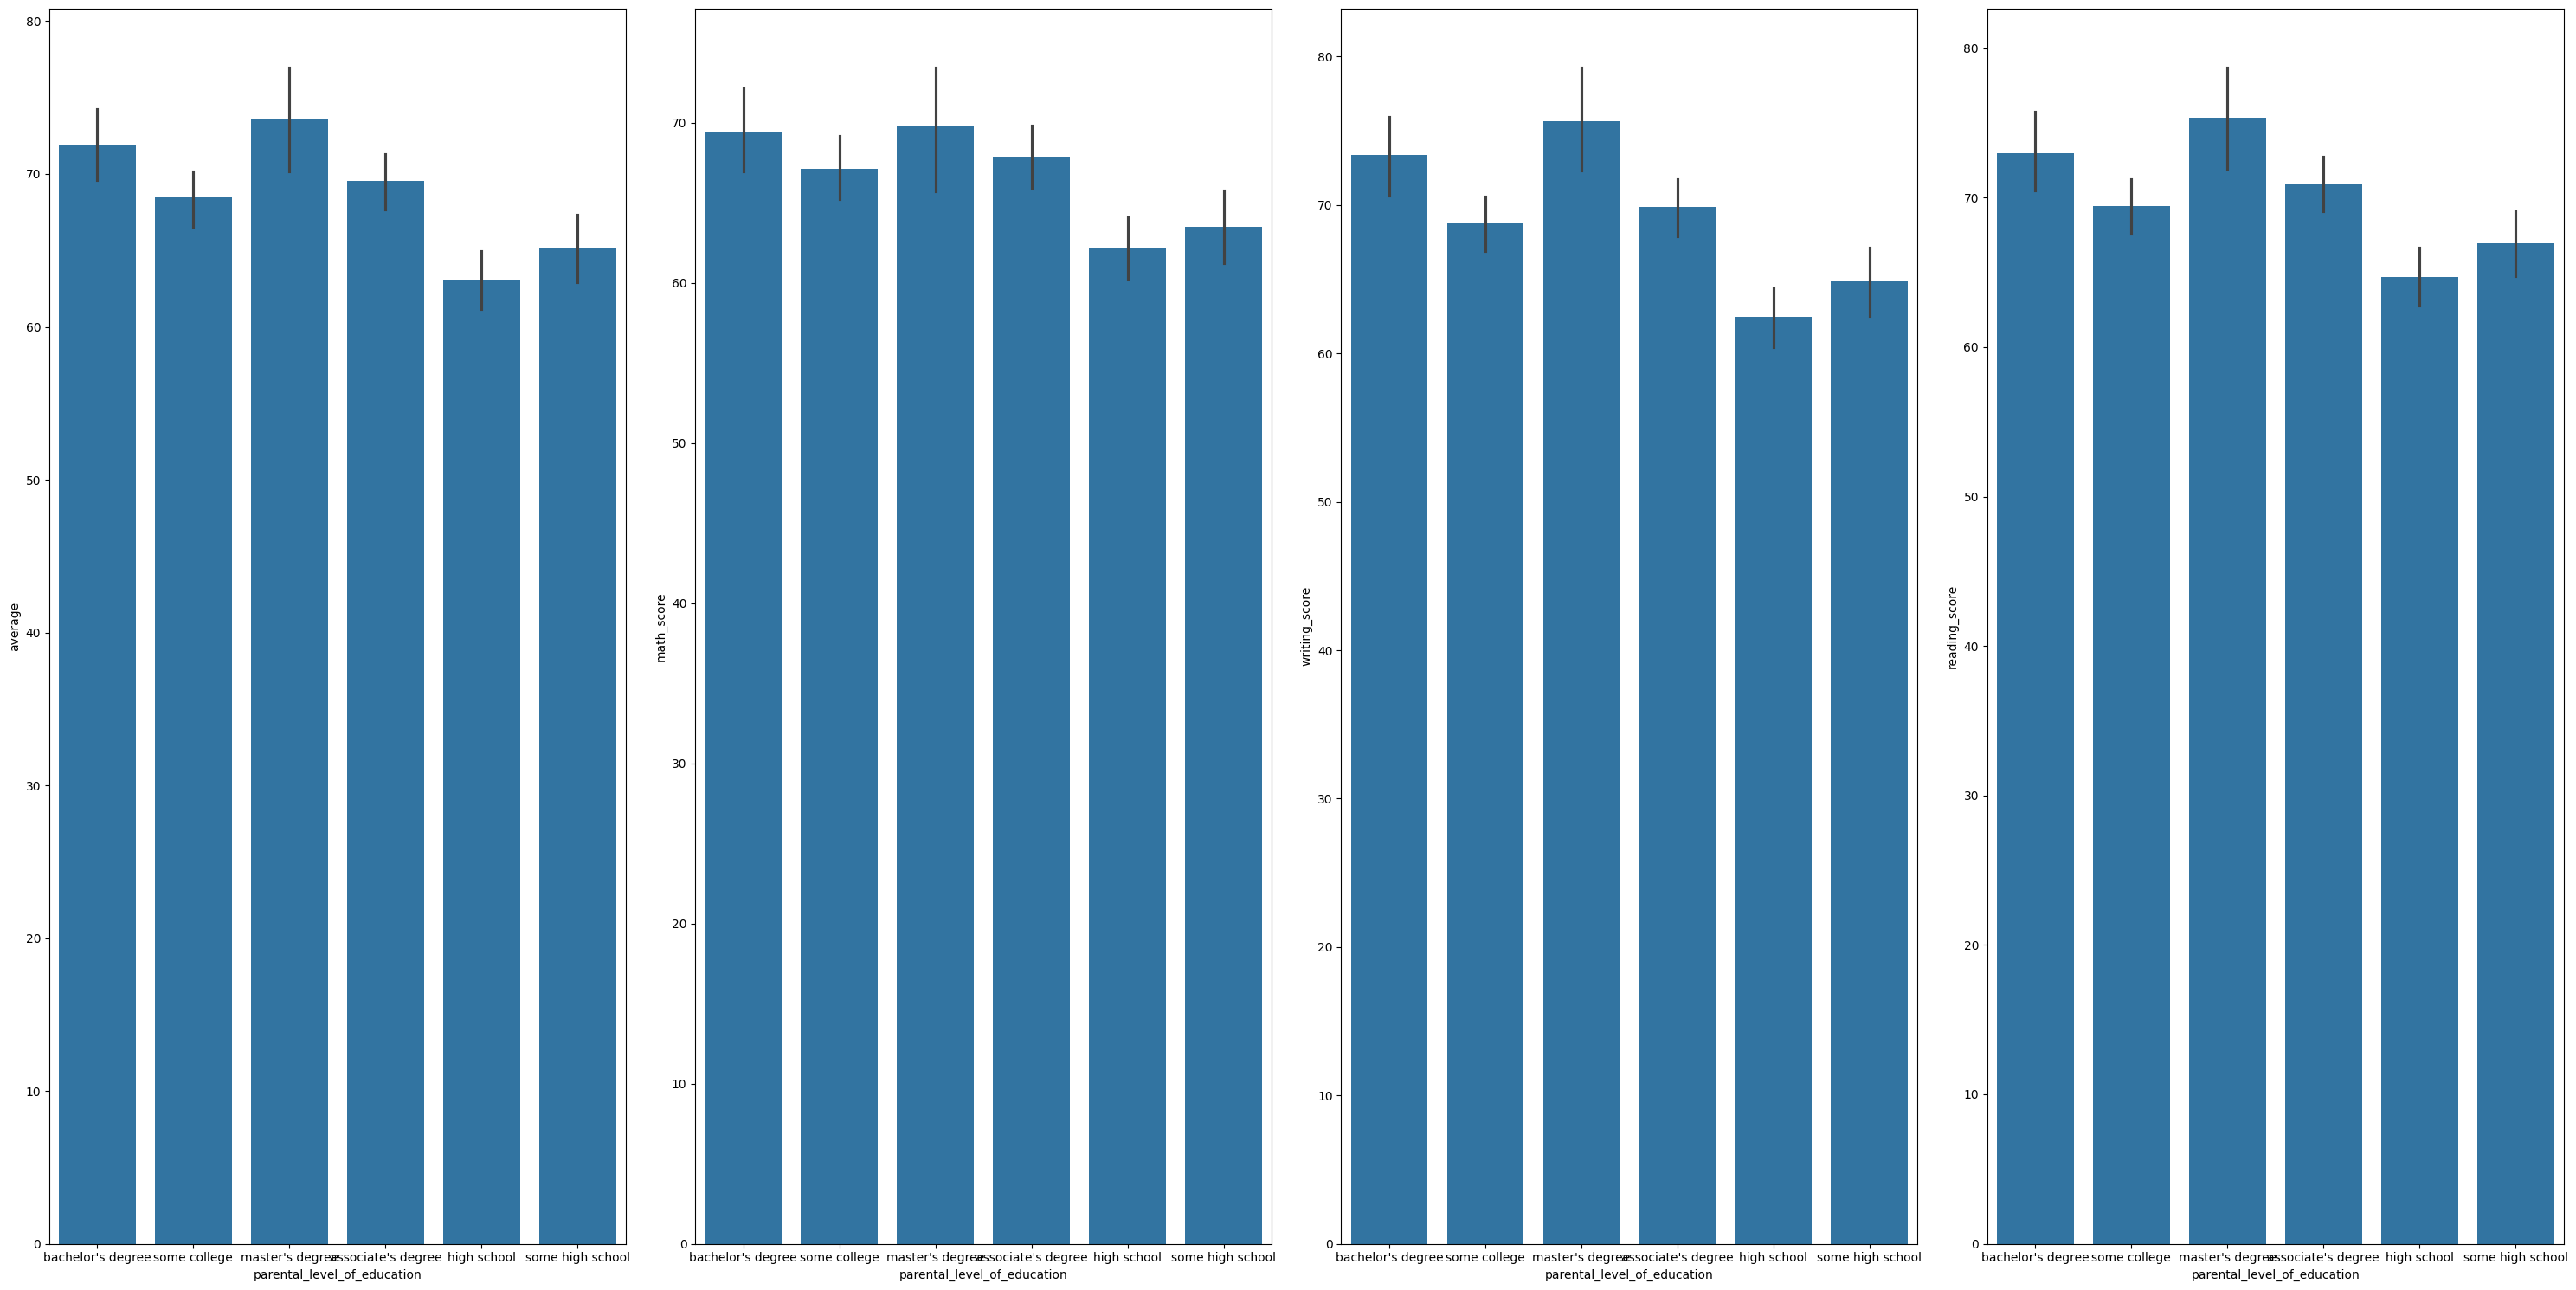

In [75]:
#plt.subplot(1,4)
plt.figure(figsize=(30, 15)) 
plt.subplot(141)
sns.barplot(x=df['parental_level_of_education'],y=df['average'])
plt.subplot(142)
sns.barplot(x=df['parental_level_of_education'],y=df['math_score'])
plt.subplot(143)
sns.barplot(x=df['parental_level_of_education'],y=df['writing_score'])
plt.subplot(144)
sns.barplot(x=df['parental_level_of_education'],y=df['reading_score'])
plt.tight_layout() 
plt.show()

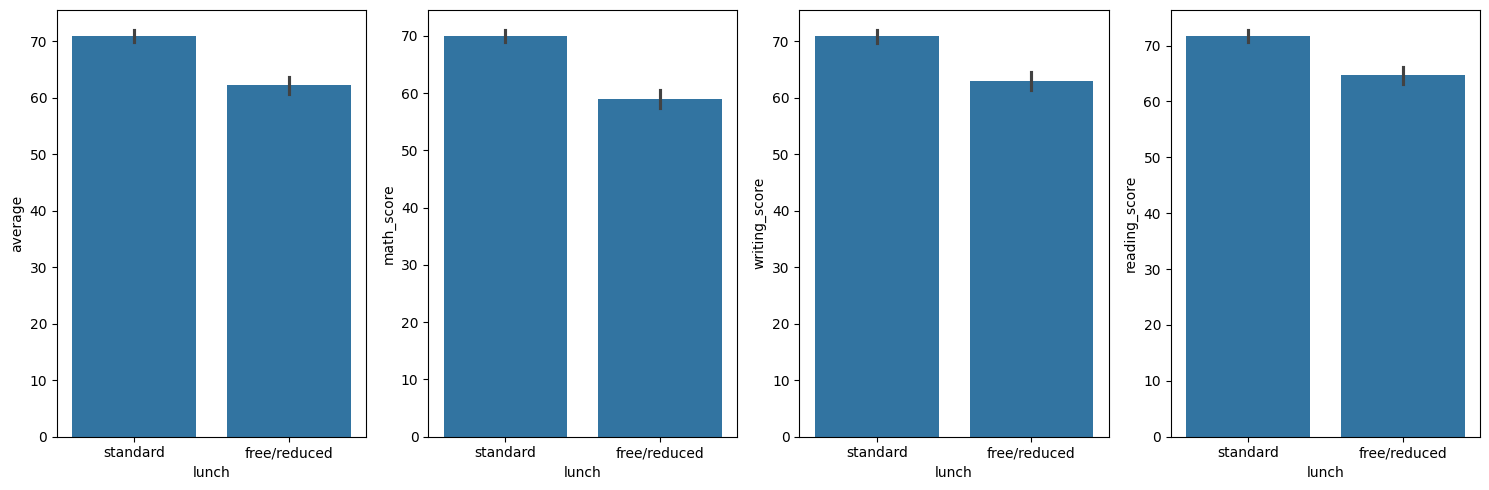

In [76]:
#plt.subplot(1,4)
plt.figure(figsize=(15, 5)) 
plt.subplot(141)
sns.barplot(x=df['lunch'],y=df['average'])
plt.subplot(142)
sns.barplot(x=df['lunch'],y=df['math_score'])
plt.subplot(143)
sns.barplot(x=df['lunch'],y=df['writing_score'])
plt.subplot(144)
sns.barplot(x=df['lunch'],y=df['reading_score'])
plt.tight_layout() 
plt.show()

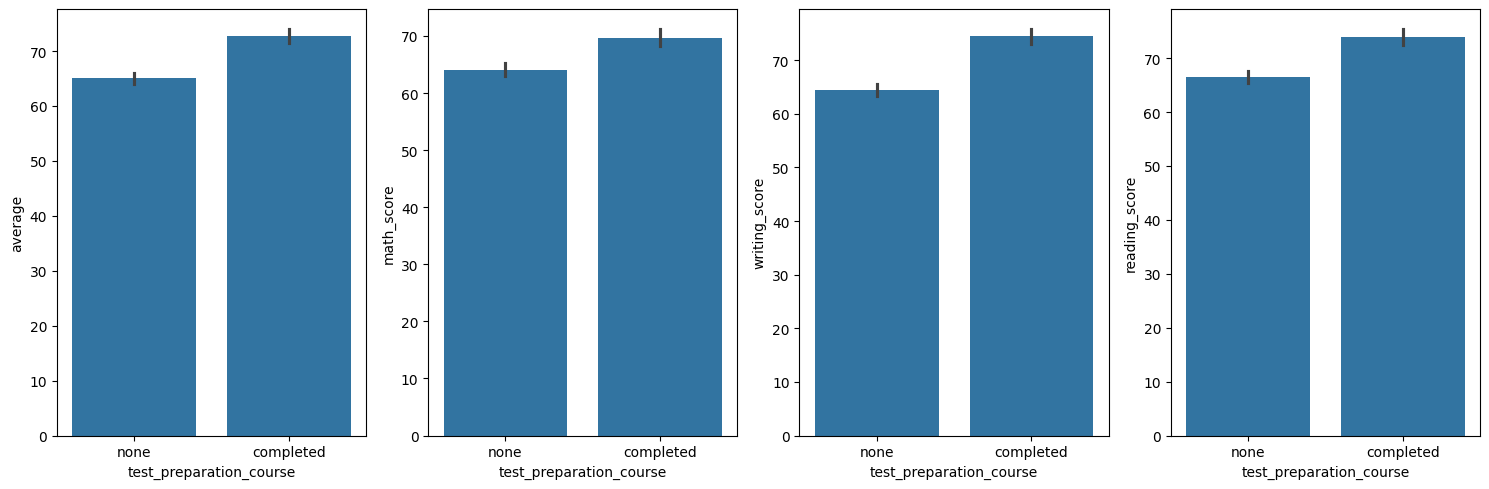

In [78]:
#plt.subplot(1,4)
plt.figure(figsize=(15, 5)) 
plt.subplot(141)
sns.barplot(x=df['test_preparation_course'],y=df['average'])
plt.subplot(142)
sns.barplot(x=df['test_preparation_course'],y=df['math_score'])
plt.subplot(143)
sns.barplot(x=df['test_preparation_course'],y=df['writing_score'])
plt.subplot(144)
sns.barplot(x=df['test_preparation_course'],y=df['reading_score'])
plt.tight_layout() 
plt.show()

## MUTIVARIATE ANALYSIS USING PAIRPLOT

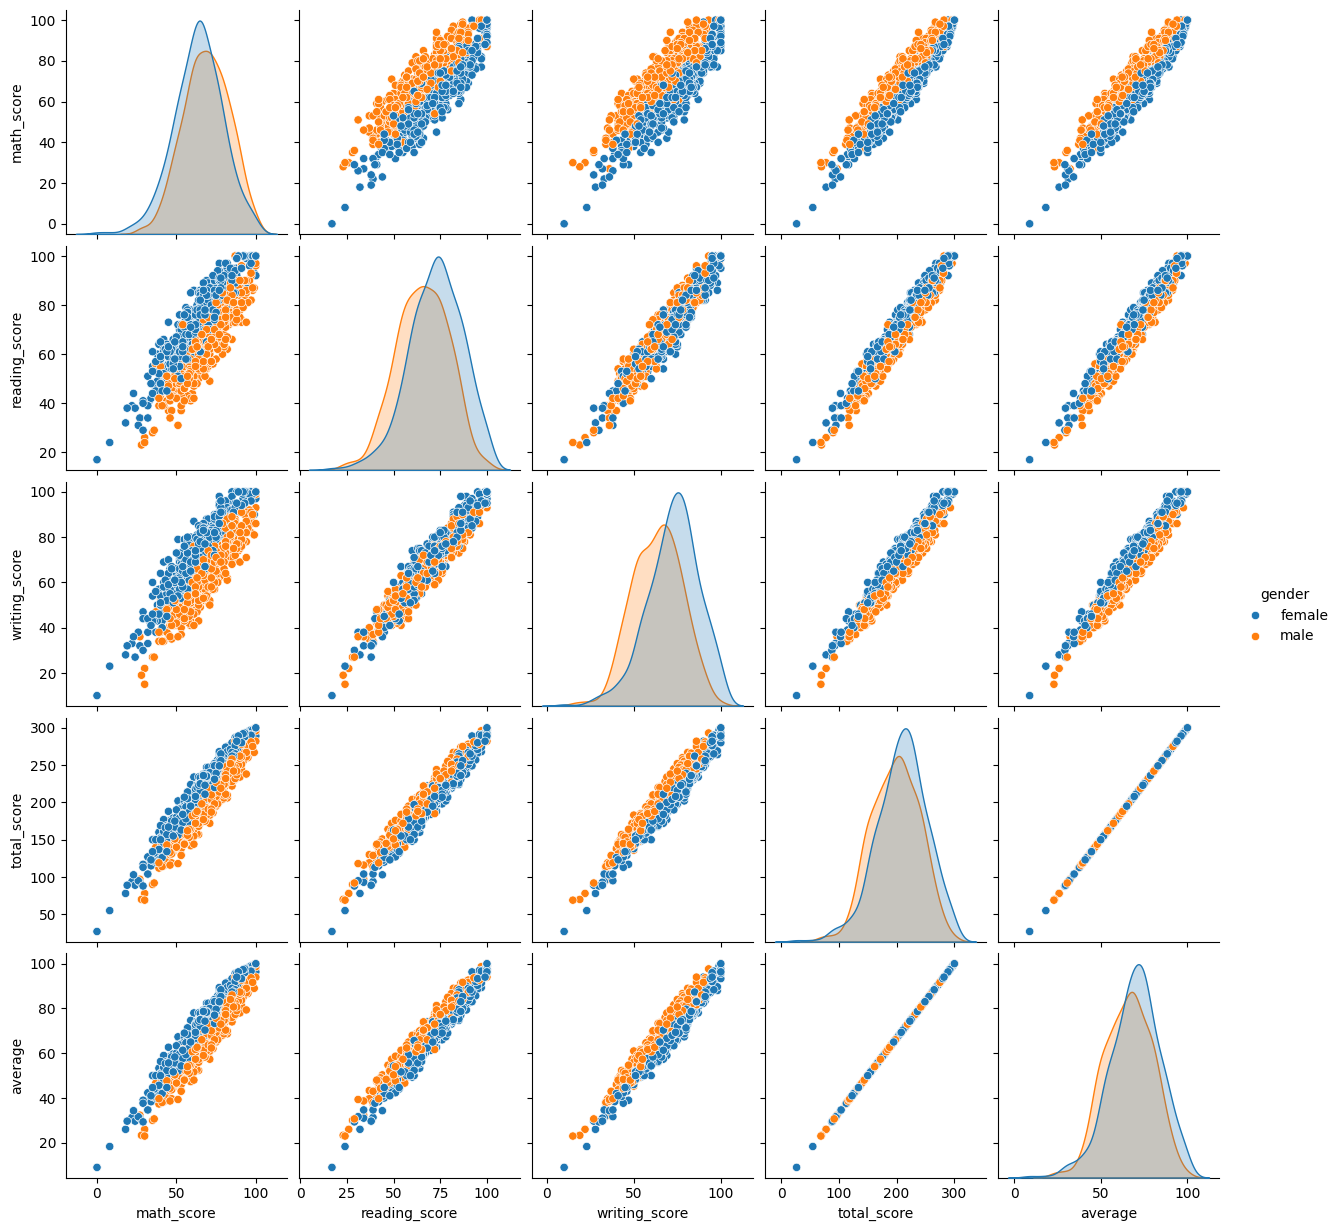

In [79]:
sns.pairplot(df,hue = 'gender')
plt.show()

## Conclusions
- Student's Performance is related with lunch, race, parental level education
- Females lead in pass percentage and also are top-scorers
- Student's Performance is not much related with test preparation course
- Finishing preparation course is benefitial.